# 脸部侦测(Face Detection)

## 载入相关套件

In [1]:
# 载入相关套件
import cv2
from cv2 import CascadeClassifier
from cv2 import rectangle
import matplotlib.pyplot as plt
from cv2 import imread

## 载入级联分类器(face cascade file)

In [2]:
# 载入脸部级联分类器(face cascade file)
face_cascade = './cascade_files/haarcascade_frontalface_alt.xml'
classifier = cv2.CascadeClassifier(face_cascade)

## 载入图档

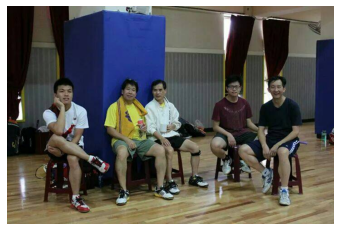

In [3]:
# 载入图档
image_file = "./images_face/teammates.jpg"
image = imread(image_file)

# OpenCV 预设为 BGR 色系，转为 RGB 色系
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 显示图像
plt.imshow(im_rgb)
plt.axis('off')
plt.show()

## 侦测脸部并显示图像

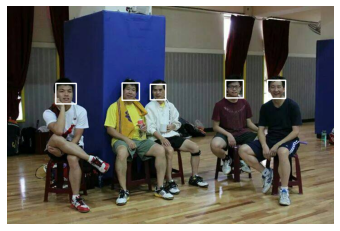

In [4]:
# 侦测脸部
bboxes = classifier.detectMultiScale(image)
# 脸部加框
for box in bboxes:
    # 取得框的座标及宽高
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # 加白色框
    rectangle(im_rgb, (x, y), (x2, y2), (255,255,255), 2)

# 显示图像
plt.imshow(im_rgb)
plt.axis('off')
plt.show()

## 载入另一图档

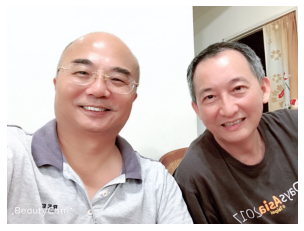

In [5]:
# 载入图档
image_file = "./images_face/classmates.jpg"
image = imread(image_file)

# OpenCV 预设为 BGR 色系，转为 RGB 色系
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 显示图像
plt.imshow(im_rgb)
plt.axis('off')
plt.show()

## 侦测脸部并显示图像

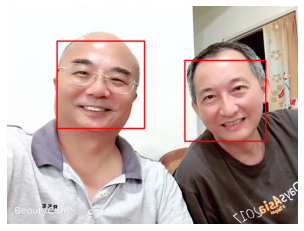

In [6]:
# 侦测脸部
bboxes = classifier.detectMultiScale(image)
# 脸部加框
for box in bboxes:
    # 取得框的座标及宽高
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # 加红色框
    rectangle(im_rgb, (x, y), (x2, y2), (255,0,0), 5)

# 显示图像
plt.imshow(im_rgb)
plt.axis('off')
plt.show()

## 载入眼睛及微笑级联分类器

In [7]:
# 载入眼睛级联分类器(eye cascade file)
eye_cascade = './cascade_files/haarcascade_eye_tree_eyeglasses.xml'
eye_classifier = cv2.CascadeClassifier(eye_cascade)

# 载入微笑级联分类器(smile cascade file)
smile_cascade = './cascade_files/haarcascade_smile.xml'
smile_classifier = cv2.CascadeClassifier(smile_cascade)

## 侦测脸部并显示图像

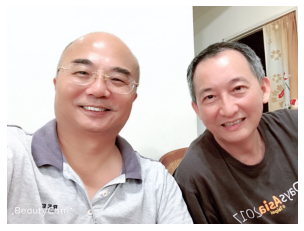

In [46]:
image_file = "./images_face/classmates.jpg"
image = imread(image_file)
# OpenCV 预设为 BGR 色系，转为 RGB 色系
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 显示图像
plt.imshow(im_rgb)
plt.axis('off')
plt.show()

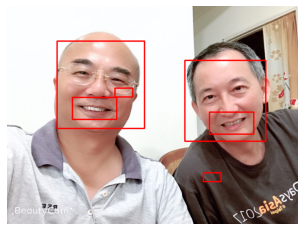

In [48]:
im_rgb_clone = im_rgb.copy()
# 侦测脸部
bboxes = classifier.detectMultiScale(image)
# 脸部加框
for box in bboxes:
    # 取得框的座标及宽高
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # 加白色框
    rectangle(im_rgb_clone, (x, y), (x2, y2), (255,0,0), 5)

# 侦测微笑
# scaleFactor=2.5：扫描时每次缩减扫描视窗的尺寸比例。
# minNeighbors=20：每一个被选中的视窗至少要有邻近且合格的视窗数
bboxes = smile_classifier.detectMultiScale(image, 2.5, 20)
#微笑加框
for box in bboxes:
    # 取得框的座标及宽高
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # 加白色框
    rectangle(im_rgb_clone, (x, y), (x2, y2), (255,0,0), 5)
#     break

# 显示图像
plt.imshow(im_rgb_clone)
plt.axis('off')
plt.show()

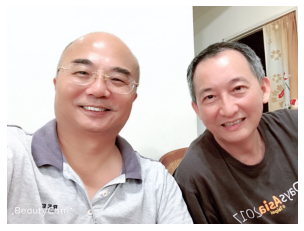

In [49]:
image_file = "./images_face/classmates.jpg"
image = imread(image_file)
# OpenCV 预设为 BGR 色系，转为 RGB 色系
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 显示图像
plt.imshow(im_rgb)
plt.axis('off')
plt.show()

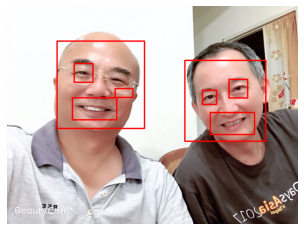

In [50]:
im_rgb_clone = im_rgb.copy()
# 侦测脸部
bboxes = classifier.detectMultiScale(image)
# 脸部加框
for box in bboxes:
    # 取得框的座标及宽高
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # 加白色框
    rectangle(im_rgb_clone, (x, y), (x2, y2), (255,0,0), 5)

    # 侦测眼睛
    face_box = image[y:y2, x:x2]
    bboxes_eye = eye_classifier.detectMultiScale(face_box, 1.1, 5)
    # 加框
    for box_eye in bboxes_eye:
        # 取得框的座标及宽高
        x, y, width, height = box_eye
        x2, y2 = x + width, y + height
        # 加白色框
        rectangle(im_rgb_clone, (x+box[0], y+box[1]), (x2+box[0], y2+box[1]), (255,0,0), 5)

    # 侦测微笑
    # scaleFactor=2.5：扫描时每次缩减扫描视窗的尺寸比例。
    # minNeighbors=20：每一个被选中的视窗至少要有邻近且合格的视窗数
    bboxes_smile = smile_classifier.detectMultiScale(face_box, 2.5, 20, 0)
    # 加框
    for box_smile in bboxes_smile:
        # 取得框的座标及宽高
        x, y, width, height = box_smile
        x2, y2 = x + width, y + height
        # 加白色框
        rectangle(im_rgb_clone, (x+box[0], y+box[1]), (x2+box[0], y2+box[1]), (255,0,0), 5)

# 显示图像
plt.imshow(im_rgb_clone)
plt.axis('off')
plt.show()